In [196]:
import pandas as pd
import numpy as np
df=pd.read_csv("forestfires.csv")
df=pd.get_dummies(df)
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


In [197]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

train_x,test_x=train_test_split(df,train_size=0.8,random_state=6)
train_y=train_x['area']
del train_x['area']
train_x=train_x.values
train_y=preprocessing.scale(train_y.values.reshape(-1, 1))
test_y=test_x['area']
del test_x['area']
test_x=test_x.values
test_y=preprocessing.scale(test_y.values.reshape(-1, 1))

In [198]:
from sklearn.linear_model import LassoCV
lasso =LassoCV()
lasso.fit(train_x, train_y)
pred_y=lasso.predict(test_x)

D:\anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [199]:
from sklearn.metrics import mean_squared_error
print('lasso系数',lasso.alpha_)
del df['area']
coef=pd.Series(lasso.coef_,index=df.columns)
print(coef)
print("选取了"+str(sum(coef!=0))+"特征，抛弃了另外的"+str(sum(coef == 0)))
print('训练集R2',lasso.score(train_x, train_y))
print('测试集R2',lasso.score(test_x, test_y))
print('MSE',mean_squared_error(test_y,pred_y))

lasso系数 0.05337596241733042
X            0.024937
Y            0.000000
FFMC        -0.000000
DMC          0.000709
DC          -0.000003
ISI         -0.006660
temp         0.011387
RH          -0.003529
wind         0.006351
rain        -0.000000
month_apr    0.000000
month_aug   -0.000000
month_dec    0.000000
month_feb    0.000000
month_jan    0.000000
month_jul    0.000000
month_jun   -0.000000
month_mar   -0.000000
month_may    0.000000
month_nov   -0.000000
month_oct   -0.000000
month_sep    0.000000
day_fri     -0.000000
day_mon     -0.000000
day_sat      0.000000
day_sun     -0.000000
day_thu      0.000000
day_tue     -0.000000
day_wed     -0.000000
dtype: float64
选取了7特征，抛弃了另外的22
训练集R2 0.020742502333597312
测试集R2 0.022515563852384957
MSE 0.977484436147615


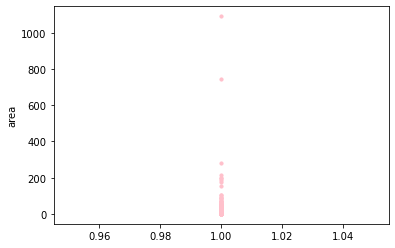

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("forestfires.csv")#读数据

#绘图排除离群值
x=np.ones((517,1))
plt.scatter(x,df['area'],color='pink',s=10.)
plt.ylabel('area')
plt.show()

#将月份转化为数字
mon=[]
for i in range(0,df['area'].values.shape[0]):
    if(df['area'][i]>400):
        df=df.drop(i)
    elif(df['month'][i]=='jan'):
        mon.append(1)
    elif(df['month'][i]=='feb'):
        mon.append(2)
    elif(df['month'][i]=='mar'):
        mon.append(3)
    elif(df['month'][i]=='apr'):
        mon.append(4)
    elif(df['month'][i]=='may'):
        mon.append(5)
    elif(df['month'][i]=='jul'):
        mon.append(6)
    elif(df['month'][i]=='jun'):
        mon.append(7)
    elif(df['month'][i]=='aug'):
        mon.append(8)
    elif(df['month'][i]=='sep'):
        mon.append(9)
    elif(df['month'][i]=='oct'):
        mon.append(10)
    elif(df['month'][i]=='nov'):
        mon.append(11)
    elif(df['month'][i]=='dec'):
        mon.append(12)
        
def minmax(name):
    data=(df[name]-df[name].min())/(df[name].max()-df[name].min())
    del df[name]
    df[name]=data
    
minmax('X')
minmax('Y')
minmax('FFMC')
minmax('DMC')
minmax('DC')
minmax('ISI')
minmax('RH')
minmax('wind')
minmax('rain')
minmax('area')

mon=np.asarray(mon)       
df=df.reset_index(drop=True)
del df['month']
del df['day']
df['month']=mon

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

train_x,test_x=train_test_split(df,train_size=0.8,random_state=10)

train_y=train_x['area']
del train_x['area']
train_x=train_x.values
train_y=train_y.values
test_y=test_x['area']
del test_x['area']
test_x=test_x.values
test_y=test_y.values

lasso =LassoCV()
lasso.fit(train_x, train_y)
pred_y=lasso.predict(test_x)

### 二、Lasso
* 采用留出法，对去掉离群值后的515个样本，取412个（80%）作为训练集，103个（20%）作为测试集
* 使用lassoCV，通过交叉验证选择最佳的模型

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

train_x,test_x=train_test_split(df,train_size=0.8,random_state=10)
train_y=train_x['area']
del train_x['area']
train_x=train_x.values
train_y=train_y.values
test_y=test_x['area']
del test_x['area']
test_x=test_x.values
test_y=test_y.values

lasso =LassoCV()
lasso.fit(train_x, train_y)
pred_y=lasso.predict(test_x)

### 三、结果展示
* 通过交叉验证获得的最佳的lasso系数
* 查看哪些特征被lasso选择了
* MSE和R2
* 可以看到拟合的效果并不是很好，回归效果很不理想，在测试集上甚至出现了残差平方和大于总平方和，使得 $R^2$ 小于0，同时，MSE很高

In [68]:
from sklearn.metrics import mean_squared_error

print('lasso系数',lasso.alpha_)

del df['area']
coef=pd.Series(lasso.coef_,index=df.columns)
print(coef)
print("选取了"+str(sum(coef!=0))+"特征，抛弃了另外的"+str(sum(coef == 0)))

print('训练集R2',lasso.score(train_x, train_y))
print('测试集R2',lasso.score(test_x, test_y))
print('MSE',mean_squared_error(test_y,pred_y))

lasso系数 0.010040884008168004
temp     0.001441
X        0.000000
Y       -0.000000
FFMC     0.000000
DMC      0.000000
DC       0.000000
ISI     -0.000000
RH      -0.000000
wind     0.000000
rain    -0.000000
month    0.000000
dtype: float64
选取了1特征，抛弃了另外的10
训练集R2 0.008412844252434715
测试集R2 -0.24810165926817307
MSE 0.002081651308872196
